<a href="https://colab.research.google.com/github/Astrizh1296/-Data-Science-/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Выпускная квалификационная работа по курсу «Data Science».**

**На тему:** Прогнозирование конечных свойств новых материалов (композиционных материалов).


Описание:
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними.
Композиты обладают теми свойствами, которые не наблюдаются у
компонентов по отдельности. При этом композиты являются монолитным
материалом, т. е. компоненты материала неотделимы друг от друга без
разрушения конструкции в целом. Яркий пример композита - железобетон.
Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная
арматура внутри бетона компенсирует его неспособность сопротивляться
сжатию, формируя тем самым новые, уникальные свойства. Современные
композиты изготавливаются из других материалов: полимеры, керамика,
стеклянные и углеродные волокна, но данный принцип сохраняется. У такого
подхода есть и недостаток: даже если мы знаем характеристики исходных
компонентов, определить характеристики композита, состоящего из этих
компонентов, достаточно проблематично. Для решения этой проблемы есть
два пути: физические испытания образцов материалов, или прогнозирование
характеристик. Суть прогнозирования заключается в симуляции
представительного элемента объема композита, на основе данных о
характеристиках входящих компонентов (связующего и армирующего
компонента).


На входе имеются данные о начальных свойствах компонентов
композиционных материалов (количество связующего, наполнителя,
температурный режим отверждения и т.д.). 
На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.


**Актуальность:** Созданные прогнозные модели помогут сократить
количество проводимых испытаний, а также пополнить базу данных
материалов возможными новыми характеристиками материалов, и
цифровыми двойниками новых композитов.
Датасет со свойствами композитов. Объединение делать по индексу
тип объединения INNER
https://drive.google.com/file/d/1B1s5gBlvgU81H9GGolLQVw_SOi-vyNf2/view?usp=sharing


**Требуется:**
1. Изучить теоретические основы и методы решения поставленной задачи.
2. Провести разведочный анализ предложенных данных. Необходимо
нарисовать гистограммы распределения каждой из переменной, диаграммы
ящика с усами, попарные графики рассеяния точек. Необходимо также для
каждой колонке получить среднее, медианное значение, провести анализ и
исключение выбросов, проверить наличие пропусков.
3. Провести предобработку данных (удаление шумов, нормализация и
т.д.).
4. Обучить нескольких моделей для прогноза модуля упругости при
растяжении и прочности при растяжении. При построении модели
необходимо 30% данных оставить на тестирование модели, на остальных
происходит обучение моделей. При построении моделей провести поиск
гиперпараметров модели с помощью поиска по сетке с перекрестной
проверкой, количество блоков равно 10.
5. Написать нейронную сеть, которая будет рекомендовать
соотношение матрица-наполнитель.
6. Разработать приложение с графическим интерфейсом или
интерфейсом командной строки, которое будет выдавать прогноз,
полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
7. Оценить точность модели на тренировочном и тестовом датасете.
8. Создать репозиторий в GitHub / GitLab и разместить там код
исследования. Оформить файл README.

# **Проводим разведочный анализ предложенных данных.**

In [51]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Загружаем и обьединяем Excel файлы
df_bp = pd.read_excel('/content/X_bp.xlsx', index_col=0)
df_nup = pd.read_excel('/content/X_nup.xlsx', index_col=0)
df = df_bp.join(df_nup, how='inner') # Объединяем два датасета
df = df.rename({'модуль упругости, ГПа': 'Модуль упругости, ГПа'}, axis='columns')
df.index = df.index.astype(int)
df.to_excel('dataset.xlsx')

**Проверяем данные на наличие пропусков**

In [53]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
Модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

В исходных данных нет пропущеных значений

**Выводим среднее, медианное значение, квантили**

In [54]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
Модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
Модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
Модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [55]:
df['Угол нашивки, град'].unique()

array([ 0., 90.])

Параметр "Угол нашивки, град" принимает всего два значения: 0 и 90 градусов.

**Построим гистограммы для каждой переменной**

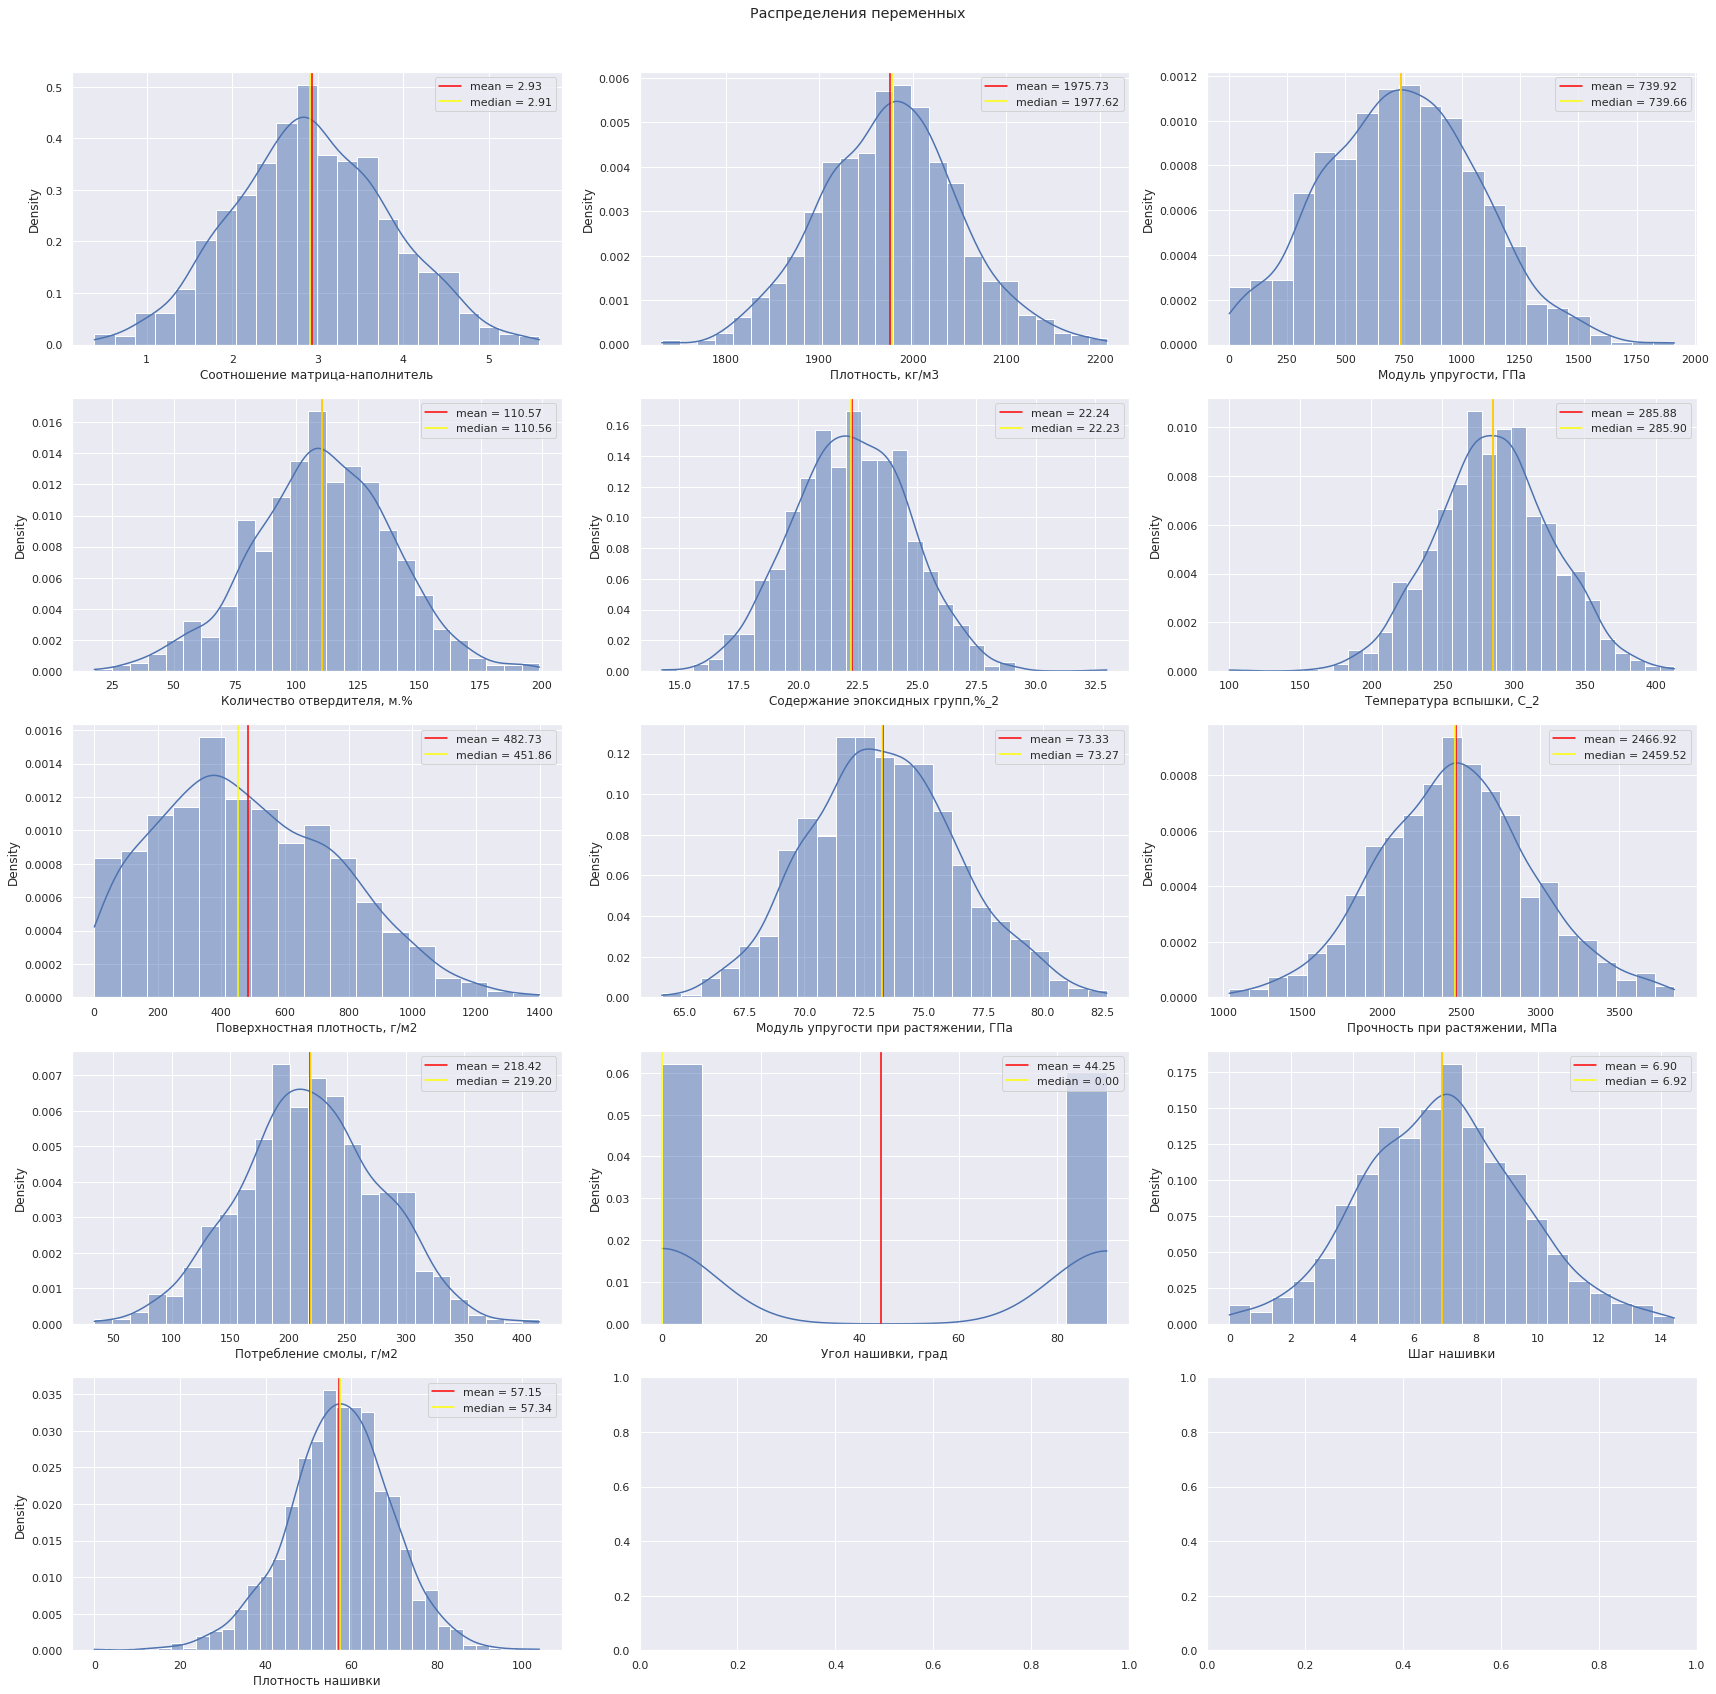

In [56]:
sns.set(rc={'figure.figsize':(24,24)})
fig, axes = plt.subplots(ncols=3, nrows=5)

for col_name, ax in zip(df.columns, axes.flat):
    sns.histplot(df[col_name], ax=ax, kde=True, stat="density") # Функция плотности
    mean = df[col_name].mean() # Среднее
    median = df[col_name].median() # Медиана
    ax.axvline(x=mean, color='red', label=f'mean = {mean:.2f}') 
    ax.axvline(x=median, color='yellow', label=f'median = {median:.2f}') 
    ax.legend()


fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Распределения переменных")
plt.show()

**Построим диаграммы рассеяния для каждых пар столбцов.**


Text(0.5, 0.98, 'Диаграммы рассеяния')

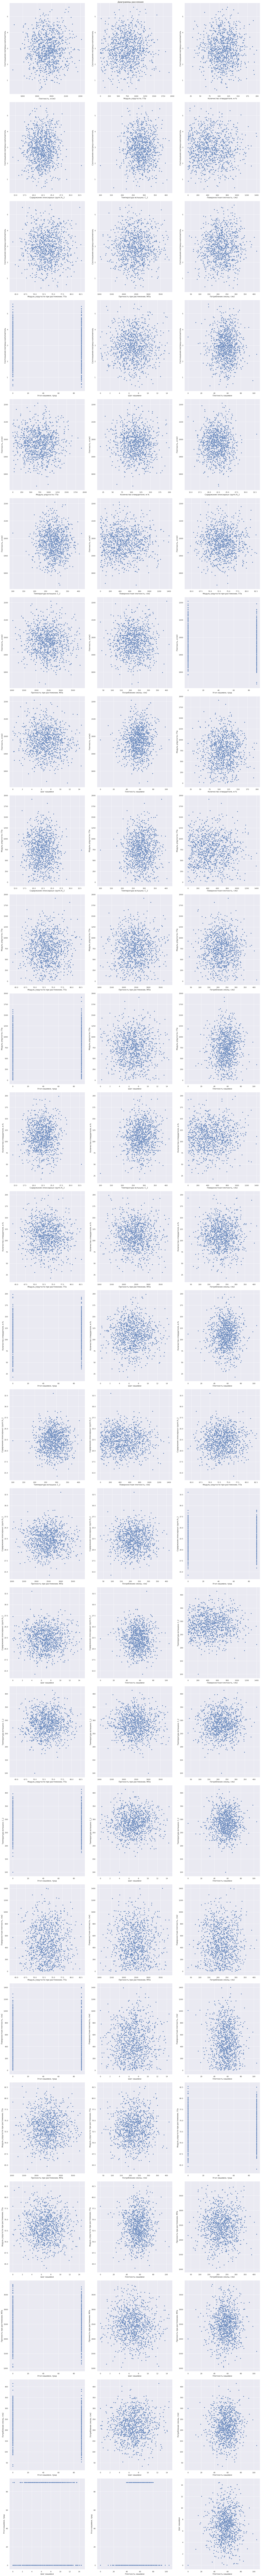

In [57]:
# Импортируем необходимую библиотеку
from itertools import combinations

sns.set(rc={'figure.figsize':(24,240)})
fig, axes = plt.subplots(ncols=3, nrows=26)

for pair_cols, ax in zip(combinations(df.columns, 2), axes.flat):
    sns.scatterplot(x=pair_cols[1], y=pair_cols[0], data=df, ax=ax)
    ax.set_xlabel(pair_cols[1])
    ax.set_ylabel(pair_cols[0])
  
fig.tight_layout(rect=[0, 0, 1, 0.98])
fig.suptitle("Диаграммы рассеяния")


По графикам видно, что выбросы есть. Некоторые точки стоят очень далеко от общего облака.

**Построение матрицы корреляция между данными, для понимания степени связи между переменными.**

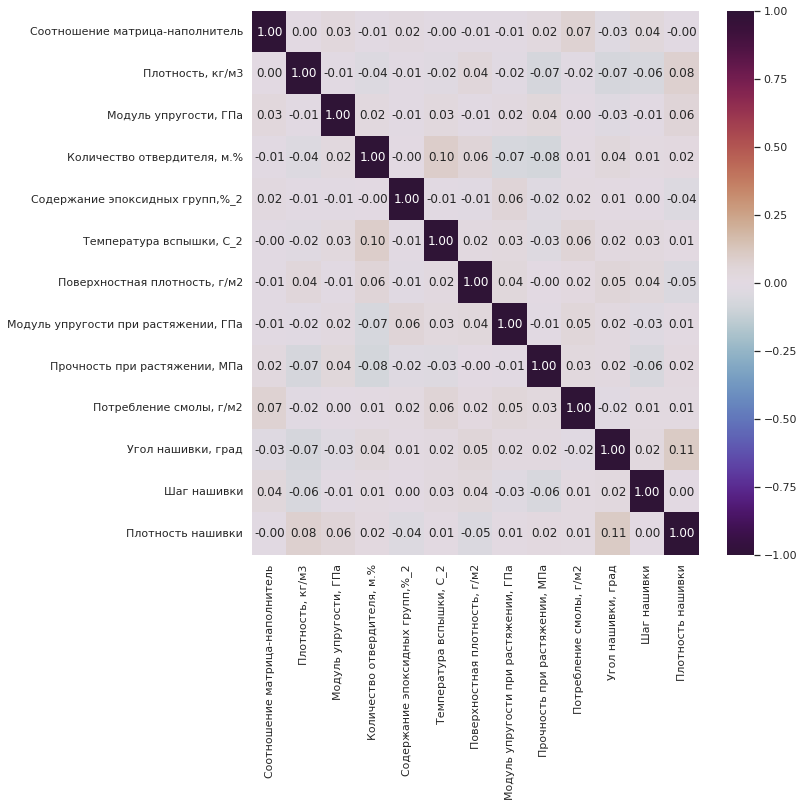

In [58]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Коэффициент корреляции — это показатель степени связи между двумя переменными или измерениями. Изменяется от -1 до +1. Величина коэффициента корреляции показывает степень зависимости: r=0 — нет никакой связи; r =0.01–0.3 — слабая связь; r =0.31–0.7 — умеренная связь; r =0.71–0.99 — сильная связь; r =1 — совершенная связь.

Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Предполагаю, что применение линейных моделей регрессии не даст приемлемого результата.

**Для анализа и поиска выбросов построим  гистограммы с усами (метод boxplot) для каждого параметра.**

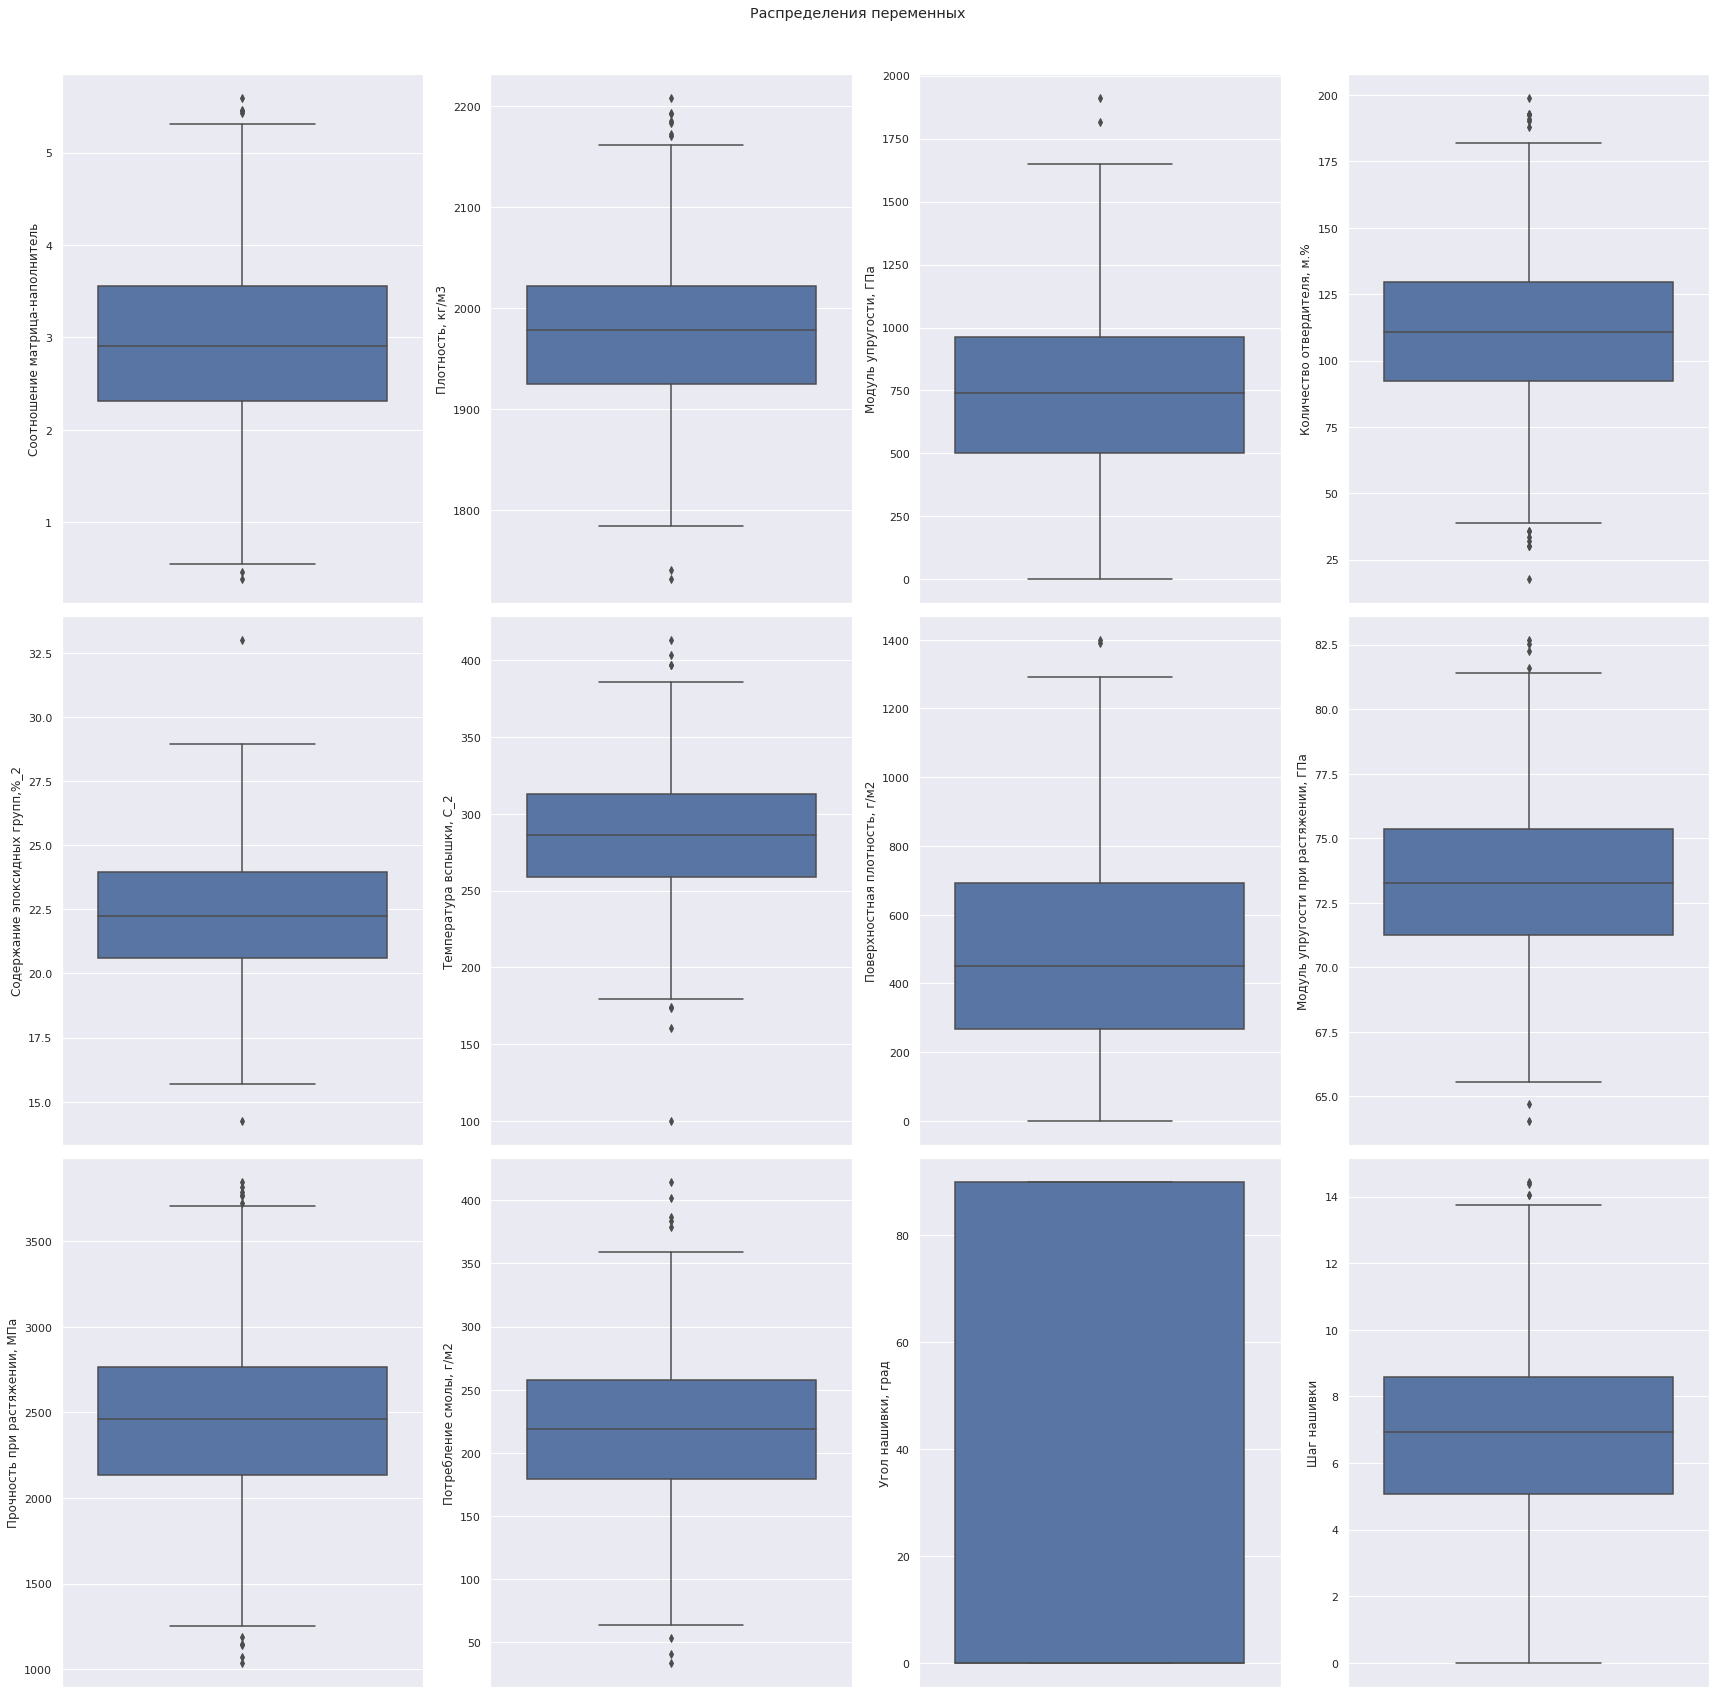

In [59]:
sns.set(rc={'figure.figsize':(24,24)})
fig, axes = plt.subplots(ncols=4, nrows=3)
col_names = list(df.columns)
for col_name, ax in zip(col_names, axes.flat):
    sns.boxplot(y=df[col_name], ax=ax)

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Распределения переменных")
plt.show()

**Удалим выбросы с помощью межквартального расстояния**

In [60]:
df_clean = df.copy()
for col_name in df.columns:
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  filter = (df_clean[col_name] >= Q1 - 1.5 * IQR) & (df_clean[col_name] <= Q3 + 1.5 *IQR)
  df_clean = df_clean.loc[filter] 

**Определяем количество аномальных записей**

In [61]:
print("Кол-во аномальных записей: {:.2f}%".format((100 *  (df.shape[0] - df_clean.shape[0]) / df.shape[0])))

Кол-во аномальных записей: 8.50%


**Результат удаления аномальных записей**

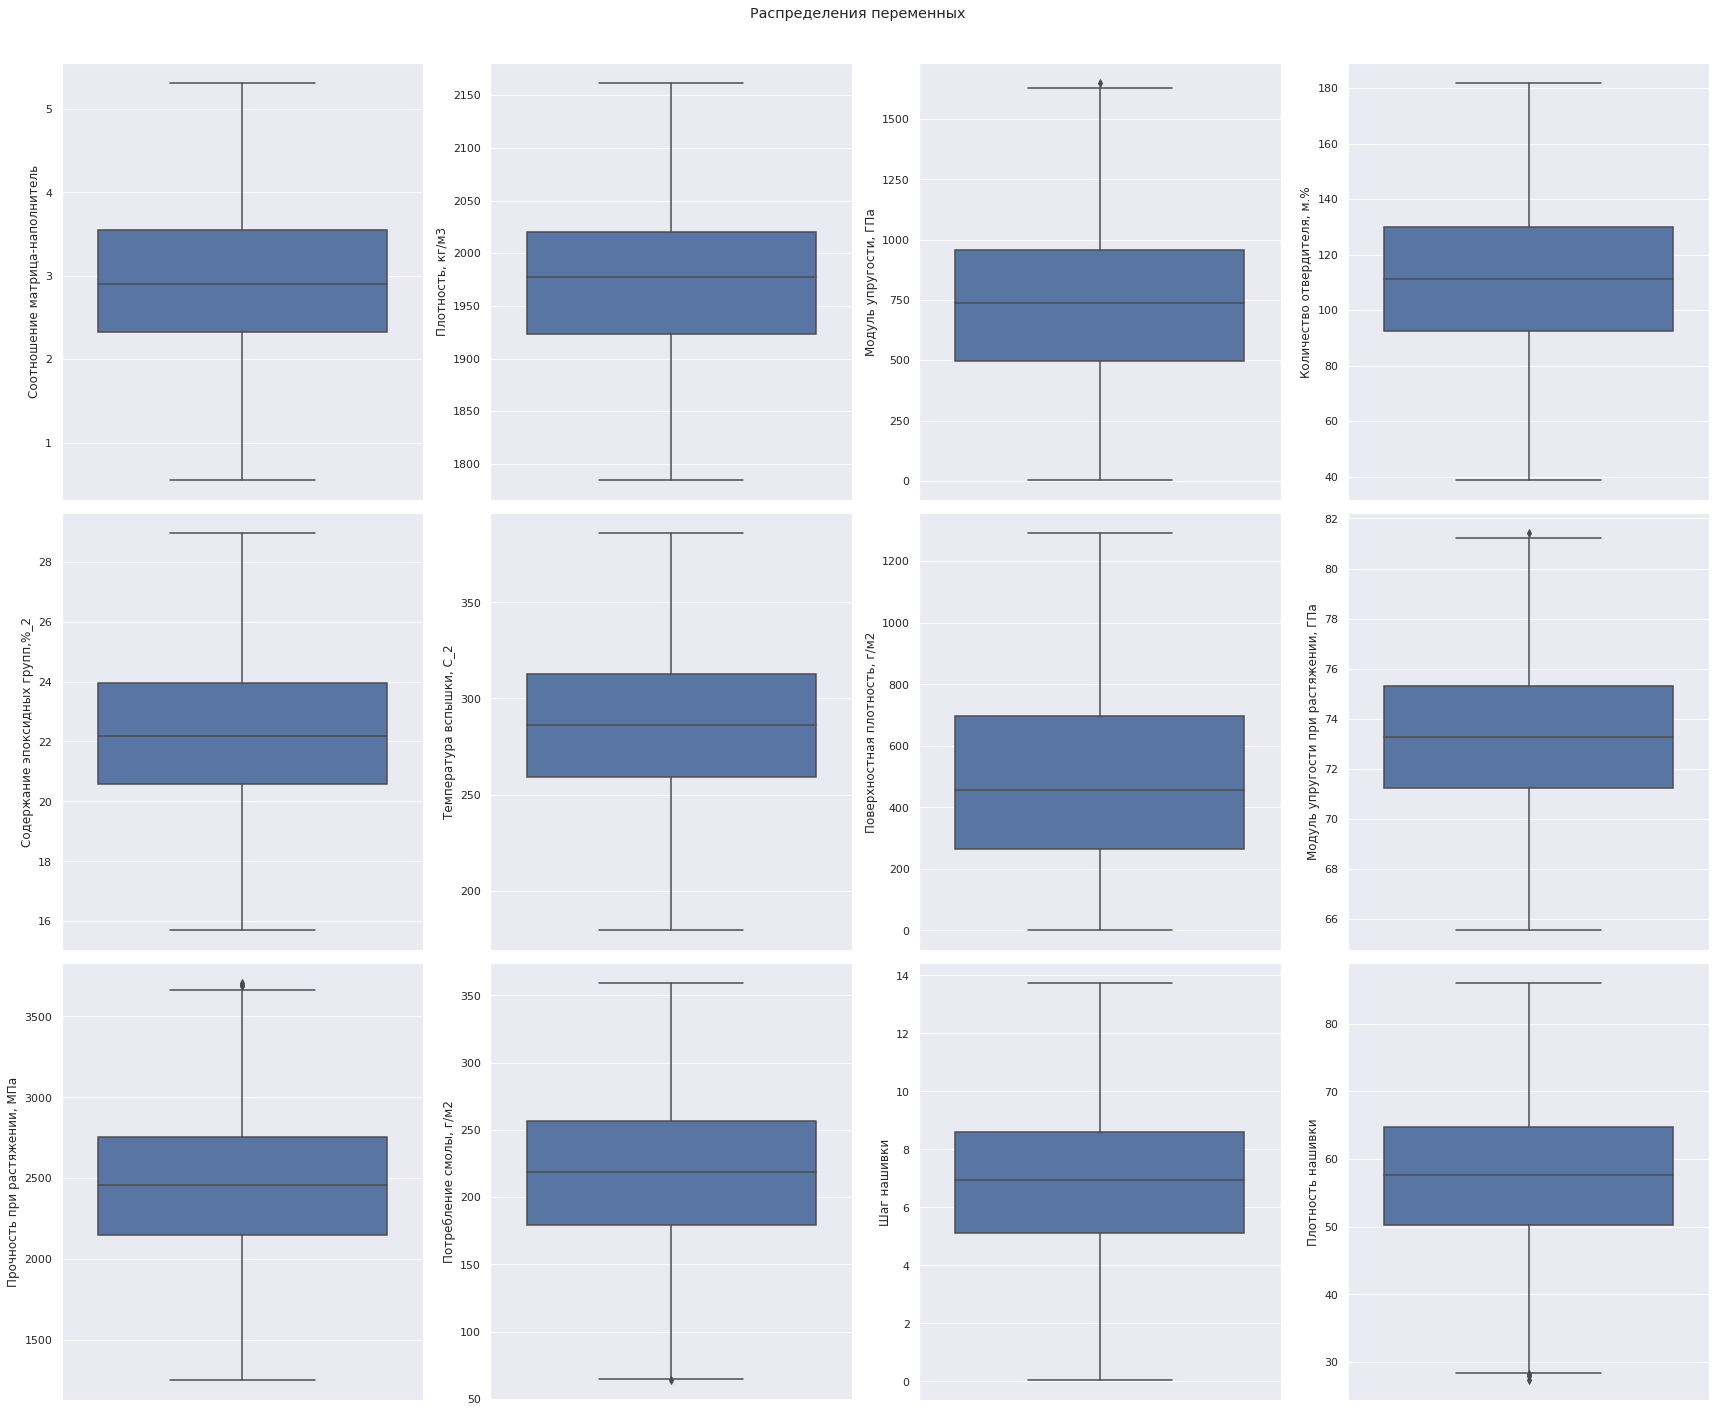

In [62]:
sns.set(rc={'figure.figsize':(24,20)})
fig, axes = plt.subplots(ncols=4, nrows=3)

col_names = list(df.columns)
col_names.remove('Угол нашивки, град')

for col_name, ax in zip(col_names, axes.flat):
    sns.boxplot(y=df_clean[col_name], ax=ax)

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Распределения переменных")
plt.show()

# **Обучение моделей для прогноза модуля упругости при растяжении и прочности при растяжении.**

**Произведём очистку данных.**

In [63]:
df_clean.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  Модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                 0.0          4.0               60.0  
3                    220.0                 0.0          5.0               47.0  
4                    220.0                 0.0          5.0               57.0  
5                    220.0                 0.0          5.0               60.0  
6                    220.0                 0.0          5.0               70.0

**Решение для определения модуля упругости при растяжении (ГПа)**

In [64]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

target_name = 'Модуль упругости при растяжении, ГПа'

y = df_clean[target_name]

# Убираем предсказываемые параметры
X = df_clean.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1, inplace=False) 


x_scaler = StandardScaler()
X_sc = x_scaler.fit_transform(X) # Нормализация данных

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

In [65]:
# Импортируем необходимые библиотеки
from time import time

from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

**Функция для подбора параметров модели и анализа результатов**

In [66]:
def build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test):

  # Обучающий набор и набор проверки для выполнения перекрестной проверки
  gsc = GridSearchCV(regressor, parameters, cv=10)
  gsc.fit(X_train,y_train.ravel())
  print("Best Hyperparameters:\n{}".format(gsc.best_params_))
  best_model = gsc.best_estimator_


  y_train_pred = best_model.predict(X_train)
  train_r2_score = best_model.score(X_train, y_train)
  # print("[Train] R-squared:{:.3f}".format(train_r2_score))
  train_mse = mean_squared_error(y_train, y_train_pred)
  # print("[Train] MSE: %.2f" % train_mse)
  train_mae = mean_absolute_error(y_train, y_train_pred)
  # print("[Train] MAE: %.2f" % train_mae)
  train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
  # print("[Train] MAPE: %.2f" % train_mape)

  y_test_pred = best_model.predict(X_test)
  test_r2_score = best_model.score(X_test,y_test)
  # print("[Test] R-squared:{:.3f}".format(test_r2_score))
  test_mse = mean_squared_error(y_test, y_test_pred)
  # print("[Test] MSE: %.2f" % test_mse)
  test_mae = mean_absolute_error(y_test, y_test_pred)
  # print("[Test] MAE: %.2f" % test_mae)
  test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
  # print("[Test] MAPE: %.2f" % test_mape)

  stat_results = pd.DataFrame({'Name':[str(regressor)[:-2], str(regressor)[:-2]], 
                               'Stage':['Train', 'Test'],
                               'R^2': [train_r2_score,test_r2_score],
                               'MSE': [train_mse,test_mse],
                               'MAE': [train_mae,test_mae],
                               'MAPE': [train_mape,test_mape]})

  fig, axes = plt.subplots(ncols=1, nrows=2)

  sns.set(rc={'figure.figsize':(28,6)})
  
  axes[0].plot(list(range(y_train.shape[0])), y_train, label='Original')
  axes[0].plot(y_train_pred, label='Predict')
  axes[0].legend()
  axes[0].set_title('Train Predictions')
  axes[1].plot(list(range(y_test.shape[0])), y_test, label='Original')
  axes[1].plot(y_test_pred, label='Predict')
  axes[1].legend()
  axes[1].set_title('Test Predictions')


  fig.suptitle(str(regressor)[:-2])
  plt.show()
  return stat_results, best_model

**Выбор регрессионной модели:**

В качестве базовой модели будем использовать **DummyRegressor**,
которую сопоставим с:
*  **GradientBoostingRegressor**
*  **RandomForestRegressor**

**DummyRegressor** - регрессор, который делает прогнозы используя простые правила (использует средние значения).

Best Hyperparameters:
{}


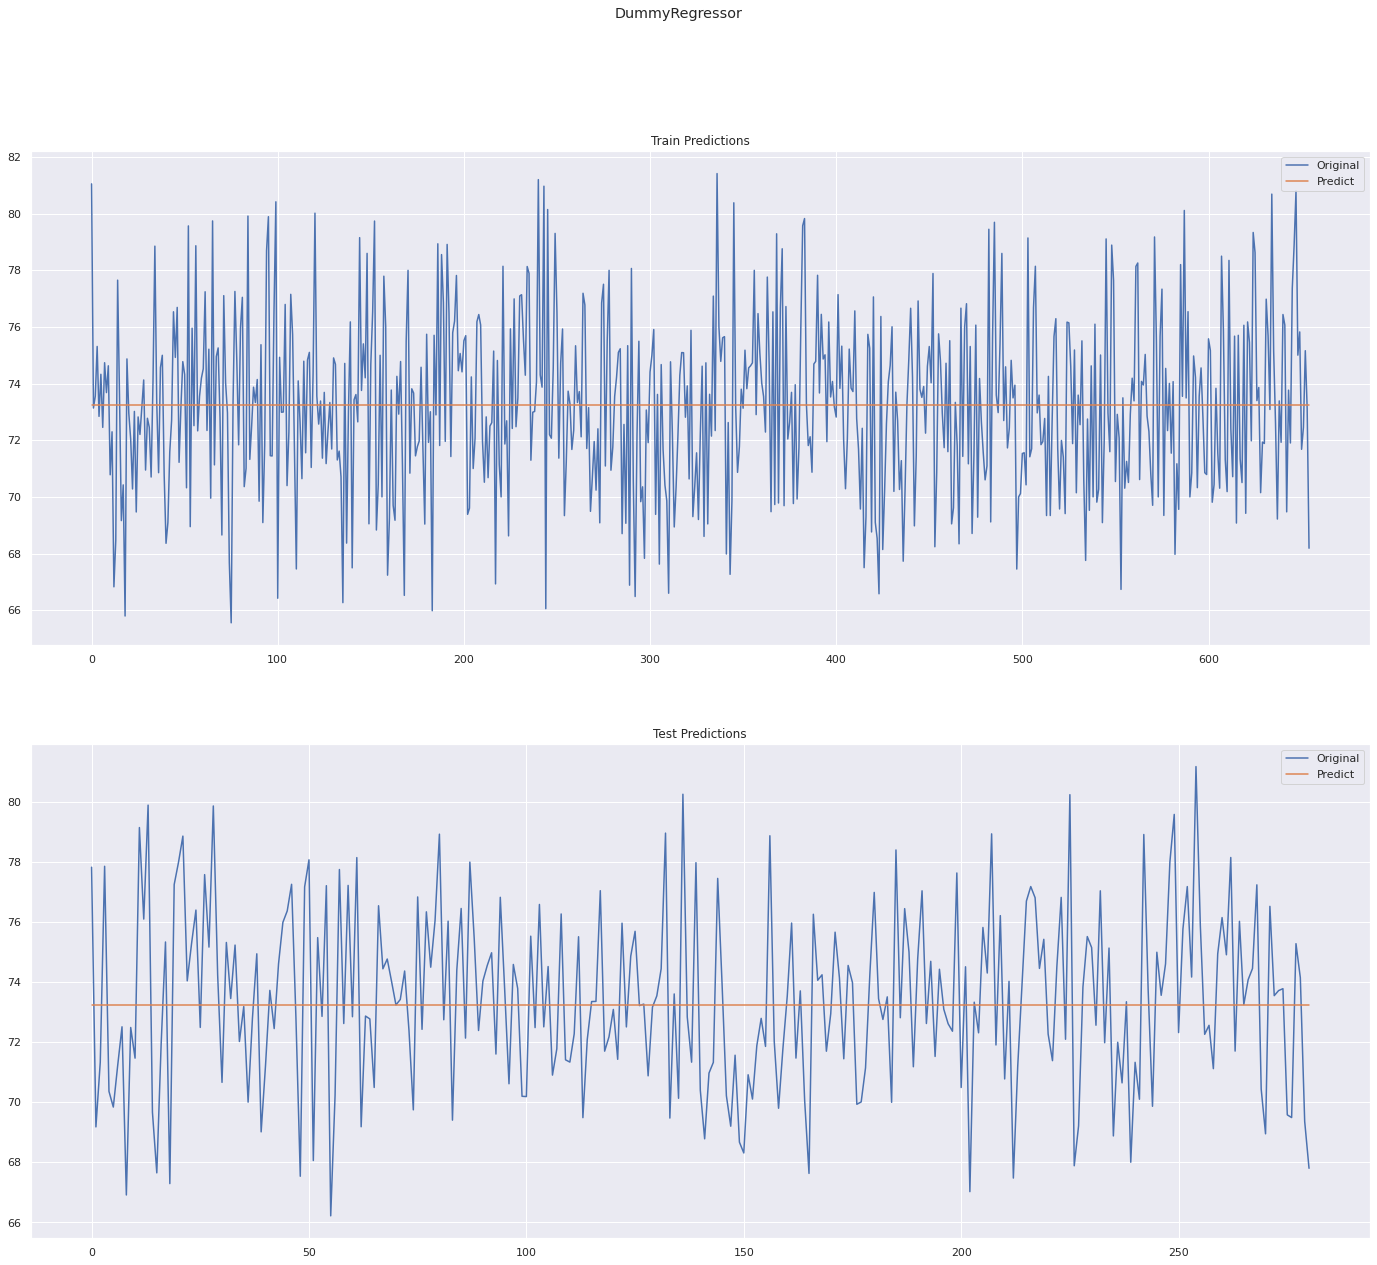

             Name  Stage      R^2       MSE       MAE      MAPE
0  DummyRegressor  Train  0.00000  9.415500  2.469857  0.033766
1  DummyRegressor   Test -0.00593  8.765902  2.398634  0.032616


In [67]:
regressor = DummyRegressor()
parameters = { }

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = pd.DataFrame(columns=['Name', 'Stage', 'R^2', 'MSE','MAE', 'MAPE'])
all_stats = all_stats.append(stats, ignore_index=True)

**RandomForestRegressor** - случайный лес, метод, в котором обучается несколько независимых деревьев решений, а их результат работы усредняется. Данный метод работает лучше, чем одно дерево, особенно если данные содержат большое кол-во параметров. В целом, деревья решения способны находить нелинейные зависимости в данных.




Best Hyperparameters:
{'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 150}


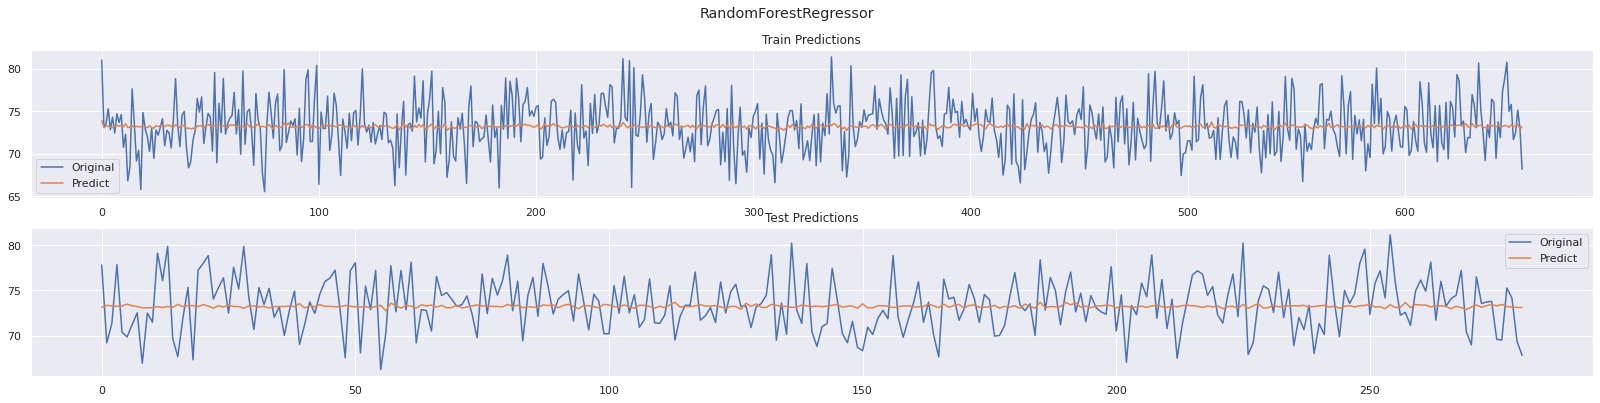

                    Name  Stage       R^2       MSE       MAE      MAPE
0  RandomForestRegressor  Train  0.043102  9.009676  2.414184  0.033001
1  RandomForestRegressor   Test -0.002771  8.738372  2.401917  0.032665


In [68]:
regressor = RandomForestRegressor()
parameters = { 
            "n_estimators"        : [50,100,150], # Число деревьев
            "max_features"        : ["sqrt", "log2"], # Кол-во параметров для расщепления
            "min_samples_split"   : [8,16], # Минимальное число объектов, при котором выполняется расщепление
            "min_samples_leaf"    : [2,5,8], # Ограничение на число объектов в листьях
            "max_depth"           : [2,3,4]} # Максимальная глубина деревьев

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

**GradientBoostingRegressor** - градиентный бустинг над деревьями решений. Данный метод, в отличие от RandomForest, работает последовательно добавляя к прошлым моделям новые так, чтобы исправлялись ошибки, допущенные предыдущими предикторами.

Best Hyperparameters:
{'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 50}


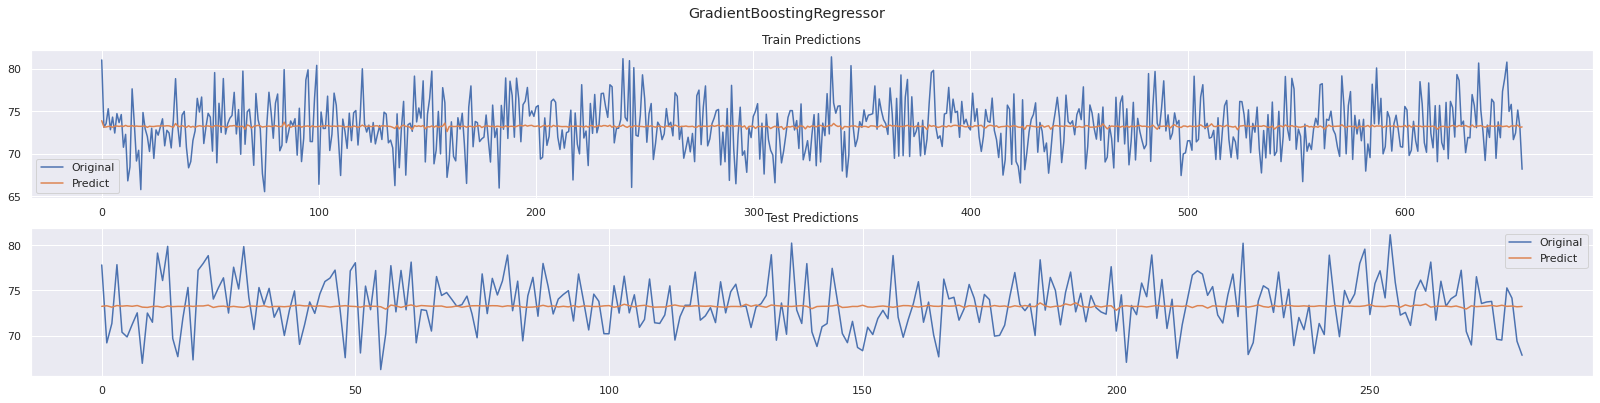

                        Name  Stage       R^2       MSE       MAE      MAPE
0  GradientBoostingRegressor  Train  0.022000  9.208363  2.442639  0.033394
1  GradientBoostingRegressor   Test -0.000305  8.716881  2.395930  0.032583


In [69]:
regressor = GradientBoostingRegressor()
parameters = { 'loss' : ['absolute_error','squared_error', 'huber', 'quantile'],
              'learning_rate' : (0.01,0.03,0.05),
              'max_features' : ['sqrt', 'log2'],
              'n_estimators': [50, 100, 150],
              'max_depth': [2,3,4],
             }

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

In [70]:
# Сравнение моделей на обучающем множестве
all_stats[all_stats['Stage'] == 'Train']

Name  Stage       R^2       MSE       MAE      MAPE
0             DummyRegressor  Train  0.000000  9.415500  2.469857  0.033766
2      RandomForestRegressor  Train  0.043102  9.009676  2.414184  0.033001
4  GradientBoostingRegressor  Train  0.022000  9.208363  2.442639  0.033394

In [71]:
# Сравнение моделей на тестовом множестве
all_stats[all_stats['Stage'] == 'Test']

Name Stage       R^2       MSE       MAE      MAPE
1             DummyRegressor  Test -0.005930  8.765902  2.398634  0.032616
3      RandomForestRegressor  Test -0.002771  8.738372  2.401917  0.032665
5  GradientBoostingRegressor  Test -0.000305  8.716881  2.395930  0.032583

**R2** — коэффициент детерминации характеризует степень сходства исходных данных и предсказанных. **MSE** - средняя квадратическая ошибка, чем ниже тем лучше. **MAE** - средняя абсолютная ошибка. **MAPE** - средняя абсолютная ошибка в процентах.

**Судя по полученным на обучающей выборке метрик, лучше всего показал себя RandomForestRegressor.**

**Решение для определения прочности при растяжении (МПа)**

In [72]:
target_name = 'Прочность при растяжении, МПа'

y = df_clean[target_name]
X = df_clean.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1, inplace=False) # Убираем предсказываемые параметры

x_scaler = StandardScaler()
X_sc = x_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

**DummyRegressor**

Best Hyperparameters:
{}


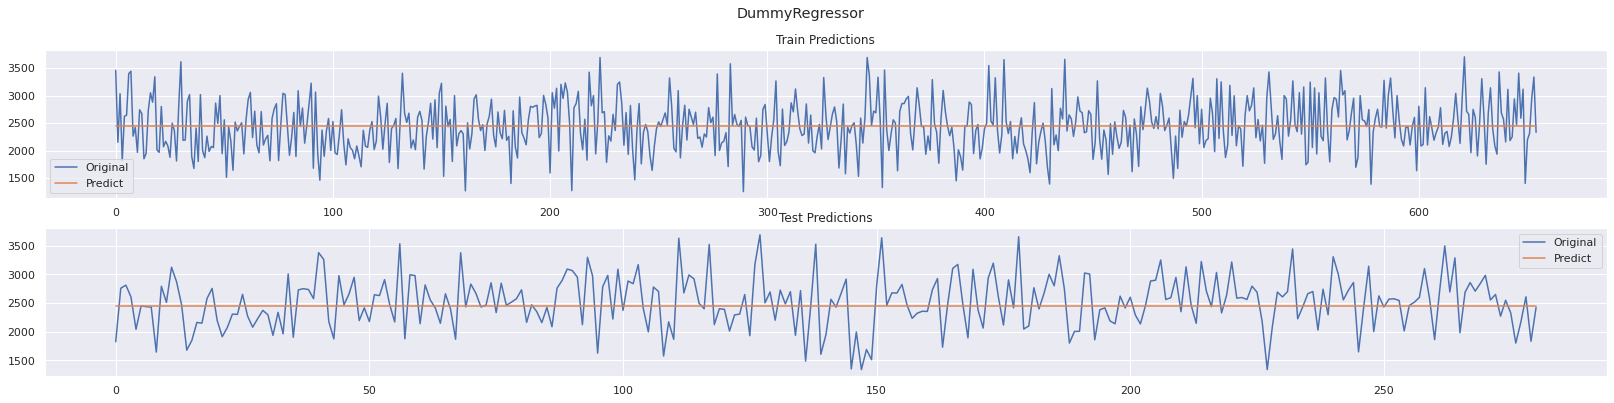

             Name  Stage       R^2            MSE         MAE      MAPE
0  DummyRegressor  Train  0.000000  217736.229939  372.430994  0.162392
1  DummyRegressor   Test -0.029672  210162.565630  360.306251  0.149034


In [73]:
regressor = DummyRegressor()
parameters = { }

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = pd.DataFrame(columns=['Name', 'Stage', 'R^2', 'MSE','MAE', 'MAPE'])
all_stats = all_stats.append(stats, ignore_index=True)

**RandomForestRegressor**

Best Hyperparameters:
{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 50}


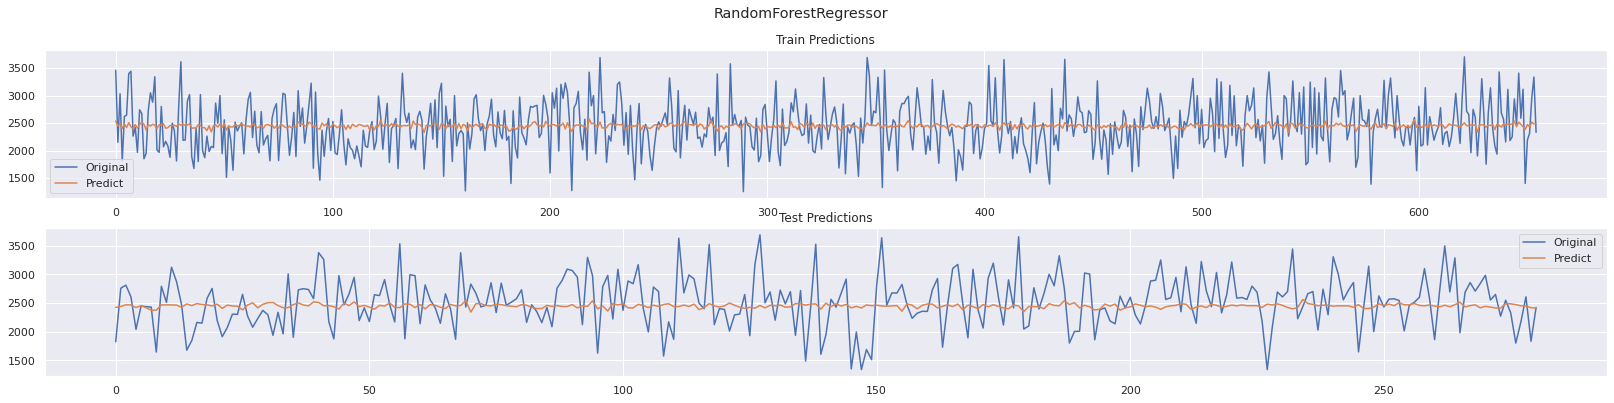

                    Name  Stage       R^2            MSE         MAE      MAPE
0  RandomForestRegressor  Train  0.057269  205266.688412  362.636414  0.158292
1  RandomForestRegressor   Test -0.031458  210527.091709  362.239458  0.149975


In [74]:
regressor = RandomForestRegressor()
parameters = { 
            "n_estimators"        : [50,100,150], # Число деревьев
            "max_features"        : ["sqrt", "log2"], # Кол-во параметров для расщепления
            "min_samples_split"   : [8,16], # Минимальное число объектов, при котором выполняется расщепление
            "min_samples_leaf"    : [2,5,8], # Ограничение на число объектов в листьях
            "max_depth"           : [2,3,4]} # Максимальная глубина деревьев

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

**GradientBoostingRegressor**

Best Hyperparameters:
{'learning_rate': 0.05, 'loss': 'absolute_error', 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 50}


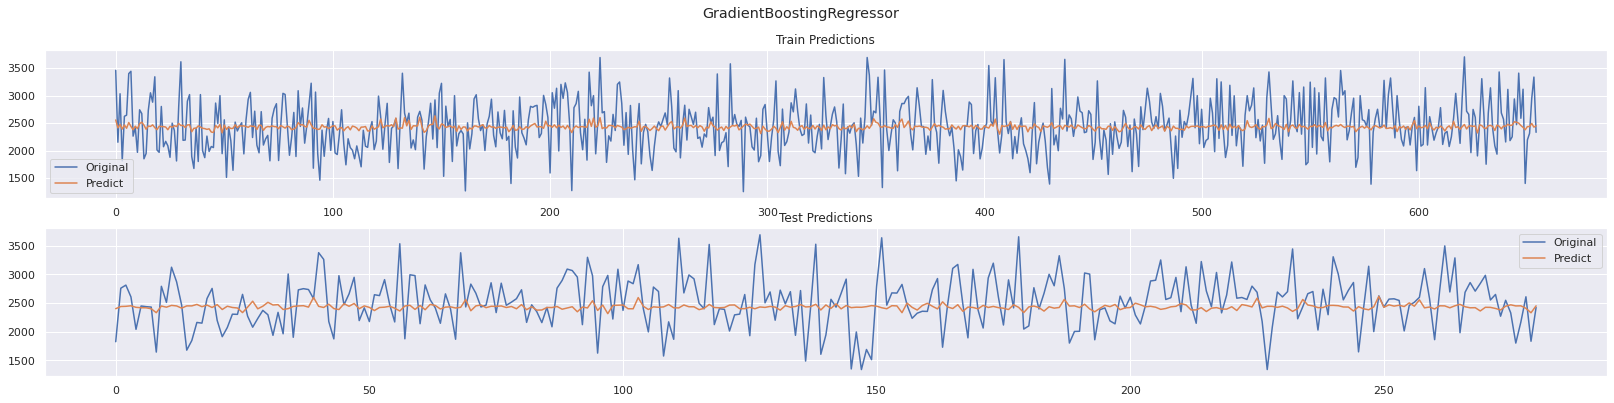

                        Name  Stage       R^2            MSE         MAE  \
0  GradientBoostingRegressor  Train  0.070563  202372.141585  354.158942   
1  GradientBoostingRegressor   Test -0.048358  213976.572198  364.372291   

       MAPE  
0  0.153634  
1  0.149626  


In [75]:
regressor = GradientBoostingRegressor()
parameters = { 'loss' : ['absolute_error','squared_error', 'huber', 'quantile'],
              'learning_rate' : (0.01,0.03,0.05),
              'max_features' : ['sqrt', 'log2'],
              'n_estimators': [50, 100, 150],
              'max_depth': [2,3,4],
             }

stats, _ = build_eval_model(regressor, parameters, X_train, X_test, y_train, y_test)
print(stats)
all_stats = all_stats.append(stats, ignore_index=True)

In [76]:
# Сравнение моделей на обучающем множестве
all_stats[all_stats['Stage'] == 'Train']

Name  Stage       R^2            MSE         MAE  \
0             DummyRegressor  Train  0.000000  217736.229939  372.430994   
2      RandomForestRegressor  Train  0.057269  205266.688412  362.636414   
4  GradientBoostingRegressor  Train  0.070563  202372.141585  354.158942   

       MAPE  
0  0.162392  
2  0.158292  
4  0.153634

In [77]:
# Сравнение моделей на тестовом множестве
all_stats[all_stats['Stage'] == 'Test']

Name Stage       R^2            MSE         MAE  \
1             DummyRegressor  Test -0.029672  210162.565630  360.306251   
3      RandomForestRegressor  Test -0.031458  210527.091709  362.239458   
5  GradientBoostingRegressor  Test -0.048358  213976.572198  364.372291   

       MAPE  
1  0.149034  
3  0.149975  
5  0.149626

**В данном случае на обучающей выборке лучше всех обучился GradientBoostingRegressor, но на тестовой он показал средний результат.**

# **Создание нейронной сети, для рекомендации соотношения матрица-наполнитель**

In [78]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import joblib
target_name = 'Соотношение матрица-наполнитель'

y = df_clean[target_name]
X = df_clean.drop([target_name], axis=1, inplace=False)

# Нормируем данные
x_scaler = StandardScaler()
X_sc = x_scaler.fit_transform(X)

# Сохраняем трансформации
joblib.dump(x_scaler, "x_scaler.pkl")
 
# Разделяем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

**Будем использовать полносвязную нейронную сеть с dropout-слоями.**

In [79]:
import tensorflow

tensorflow.random.set_seed(42)


model = tensorflow.keras.Sequential([

  tensorflow.keras.layers.Dense(12, activation='relu', kernel_initializer=tensorflow.keras.initializers.RandomNormal()),
  tensorflow.keras.layers.Dropout(0.01),
  tensorflow.keras.layers.Dense(24, activation='relu', kernel_initializer=tensorflow.keras.initializers.RandomNormal()),
  tensorflow.keras.layers.Dropout(0.01),
  tensorflow.keras.layers.Dense(24, activation='relu', kernel_initializer=tensorflow.keras.initializers.RandomNormal()),
  tensorflow.keras.layers.Dropout(0.01),
  tensorflow.keras.layers.Dense(12, activation='relu', kernel_initializer=tensorflow.keras.initializers.RandomNormal()),
   tensorflow.keras.layers.Dropout(0.01),
  tensorflow.keras.layers.Dense(1, kernel_initializer=tensorflow.keras.initializers.RandomNormal())
])

model.compile(
    loss=['mse'],
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=[tensorflow.keras.metrics.RootMeanSquaredError()]
)

# Обучение нейросети
history = model.fit(X_train, y_train, epochs=20, validation_split = 0.1)

Epoch 1/20
19/19 [==============================] - 1s 11ms/step - loss: 9.4442 - root_mean_squared_error: 3.0731 - val_loss: 8.9464 - val_root_mean_squared_error: 2.9910
Epoch 2/20
19/19 [==============================] - 0s 4ms/step - loss: 9.3485 - root_mean_squared_error: 3.0575 - val_loss: 8.8258 - val_root_mean_squared_error: 2.9708
Epoch 3/20
19/19 [==============================] - 0s 4ms/step - loss: 9.1799 - root_mean_squared_error: 3.0298 - val_loss: 8.5826 - val_root_mean_squared_error: 2.9296
Epoch 4/20
19/19 [==============================] - 0s 3ms/step - loss: 8.8033 - root_mean_squared_error: 2.9670 - val_loss: 8.0061 - val_root_mean_squared_error: 2.8295
Epoch 5/20
19/19 [==============================] - 0s 3ms/step - loss: 7.9143 - root_mean_squared_error: 2.8132 - val_loss: 6.6896 - val_root_mean_squared_error: 2.5864
Epoch 6/20
19/19 [==============================] - 0s 3ms/step - loss: 6.0332 - root_mean_squared_error: 2.4563 - val_loss: 4.2684 - val_root_mean_s

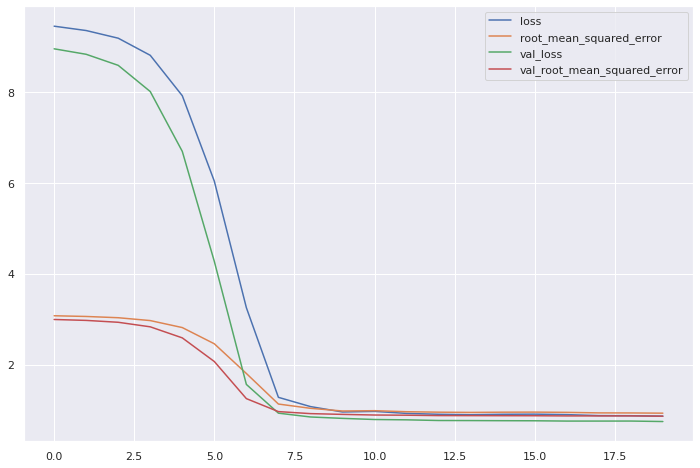

In [80]:
# График ошибки
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.show()

21/21 [==============================] - 0s 1ms/step
   Stage       R^2      RMSE       MSE       MAE      MAPE
0  Train -7.512001  0.908545  0.825455  0.734101  0.255678


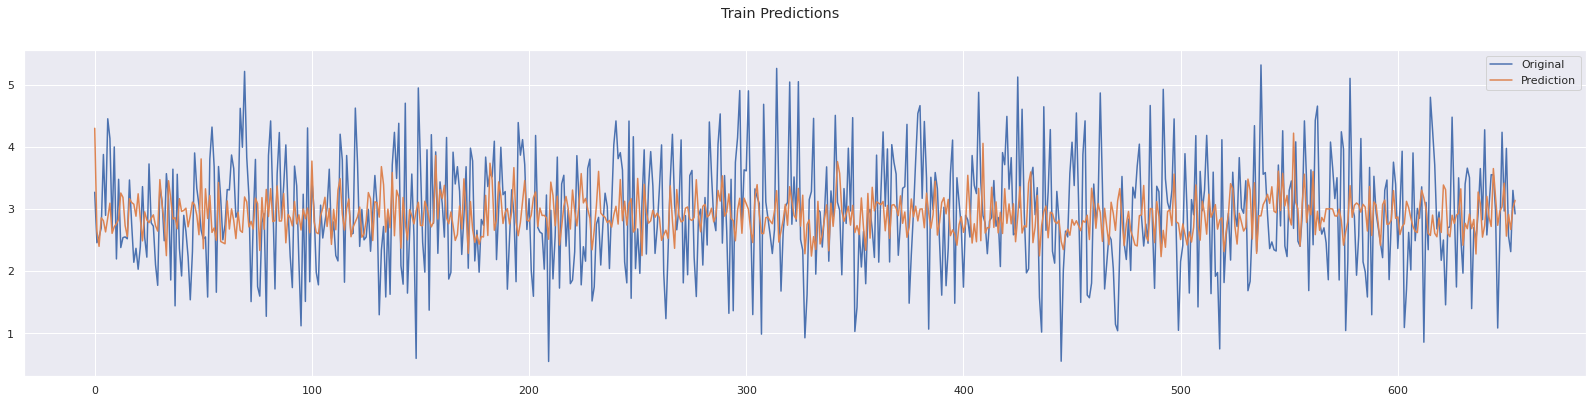

In [81]:
sns.set(rc={'figure.figsize':(28,6)})

from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
import math

y_pred = model.predict(X_train)
plt.plot(list(range(y_train.shape[0])), y_train, label="Original")
plt.plot(y_pred, label="Prediction")
plt.legend()
plt.suptitle('Train Predictions')

r2 = r2_score(y_pred, y_train)
mse = mean_squared_error(y_pred, y_train)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_pred, y_train)
mape = mean_absolute_percentage_error(y_pred, y_train)

stats = pd.DataFrame(data={'Stage':'Train',
                           'R^2':r2, 
                           'RMSE':rmse, 
                           'MSE':mse,
                           'MAE':mae, 
                           'MAPE':mape}, index=[0])

print(stats)

9/9 [==============================] - 0s 2ms/step
   Stage       R^2      RMSE       MSE       MAE      MAPE
0  Train -7.512001  0.908545  0.825455  0.734101  0.255678
1   Test -7.474679  0.946245  0.895380  0.764949  0.267828


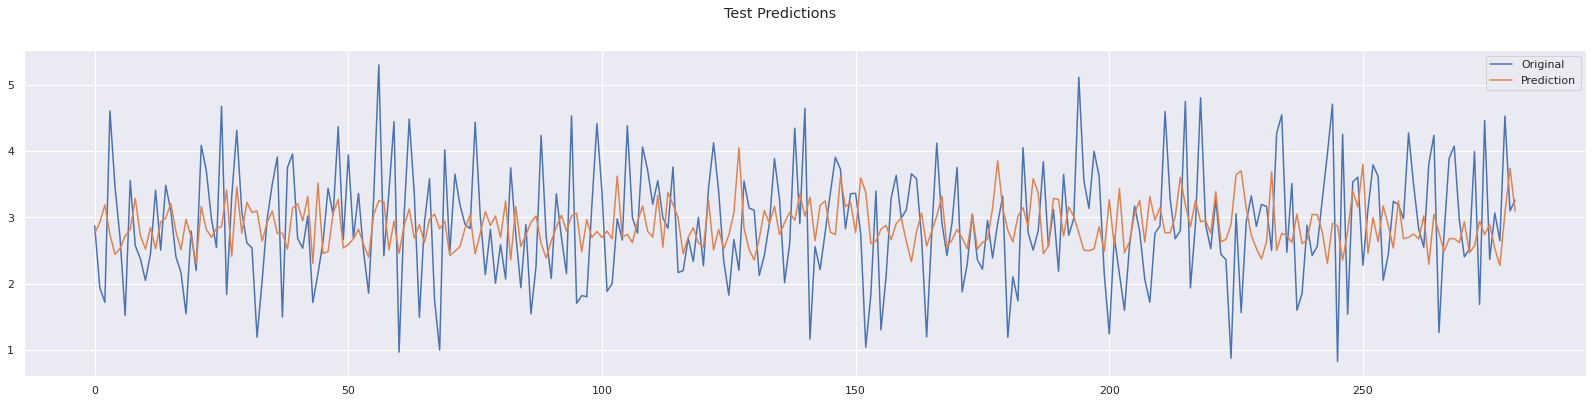

In [82]:
y_pred = model.predict(X_test)
plt.plot(list(range(y_test.shape[0])), y_test, label='Original')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.suptitle('Test Predictions')

r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)
mape = mean_absolute_percentage_error(y_pred, y_test)

stats = stats.append(pd.DataFrame(data={'Stage':'Test',
                      'R^2':r2, 
                      'RMSE':rmse, 
                      'MSE':mse,
                      'MAE':mae, 
                      'MAPE':mape}, index=[1]))

print(stats)

Визуально можно заметить, что нейронная сеть гораздо лучше выявила закономерности в данных, чем модели из п.4

[Text(0.5, 1.0, 'Гистограмма ошибок')]

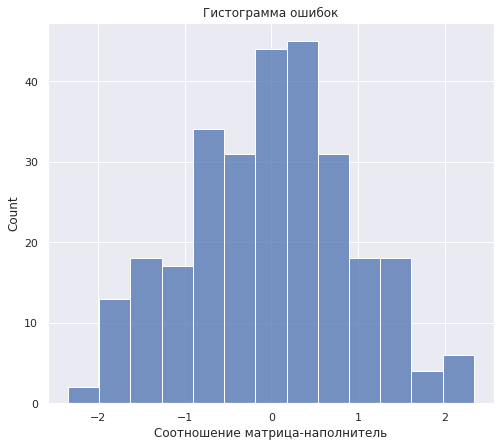

In [83]:
sns.set(rc={'figure.figsize':(8,7)})
sns.histplot(y_pred.ravel() - y_test).set(title='Гистограмма ошибок')

**Метрики качества для обучающей и тестовой выборки**

In [84]:
stats

Stage       R^2      RMSE       MSE       MAE      MAPE
0  Train -7.512001  0.908545  0.825455  0.734101  0.255678
1   Test -7.474679  0.946245  0.895380  0.764949  0.267828

***R2 меньше 0, плохая регрессия. не сильно хуже чем на трейне.***

# **Разработка приложения**

**Для использования в приложении обученных моделей их надо сохранить.**


In [85]:
model.save('models')
!zip -r /content/file.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/keras_metadata.pb (deflated 91%)
  adding: content/models/assets/ (stored 0%)
  adding: content/models/variables/ (stored 0%)
  adding: content/models/variables/variables.data-00000-of-00001 (deflated 36%)
  adding: content/models/variables/variables.index (deflated 68%)
  adding: content/models/saved_model.pb (deflated 90%)


**Импортируем необходимые библиотеки, загружаем модель.**

In [86]:
import tensorflow as tf
import joblib
import numpy as np

# Загружаем модель
model = tf.keras.models.load_model('/content/models')
# Загружаем трансформацию
x_scaler = joblib.load("/content/x_scaler.pkl") 

**Реализуем консольное приложение, использующее полученную нейронную сеть для предсказания оптимального соотношения матрица-наполнитель.**

In [87]:
param_names = ['Плотность, кг/м3', 'Модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 
               'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 
               'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
param_list = []

print("Введите параметры:")

for param_name in param_names:
  while True:
    try:
        param = input('- ' + param_name + ': ')
        param_list += [float(param)]
    except ValueError:
        print("Ошибка ввода, попробуйте еще раз.")
        continue
    else:
      break

input_data = pd.DataFrame([param_list], columns=param_names)
X = x_scaler.transform(input_data)
y = model.predict(X)
print("Рекомендуемое соотношение матрица-наполнитель: ", y[0][0])

Введите параметры:
- Плотность, кг/м3: 1800
- Модуль упругости, ГПа: 600
- Количество отвердителя, м.%: 100
- Содержание эпоксидных групп,%_2: 21
- Температура вспышки, С_2: 200
- Поверхностная плотность, г/м2: 300
- Модуль упругости при растяжении, ГПа: 72
- Прочность при растяжении, МПа: 2300
- Потребление смолы, г/м2: 200
- Угол нашивки, град: 90
- Шаг нашивки: 6
- Плотность нашивки: 55
1/1 [==============================] - 0s 62ms/step
Рекомендуемое соотношение матрица-наполнитель:  3.3348348
